# Vector, line and significance plots


# `cfp.vect` - vector plots



In [1]:
# Inline images in Ipython Notebook - not needed in Python
%matplotlib inline

# Import cf-python and cf-plot packages
import cf
import cfplot as cfp

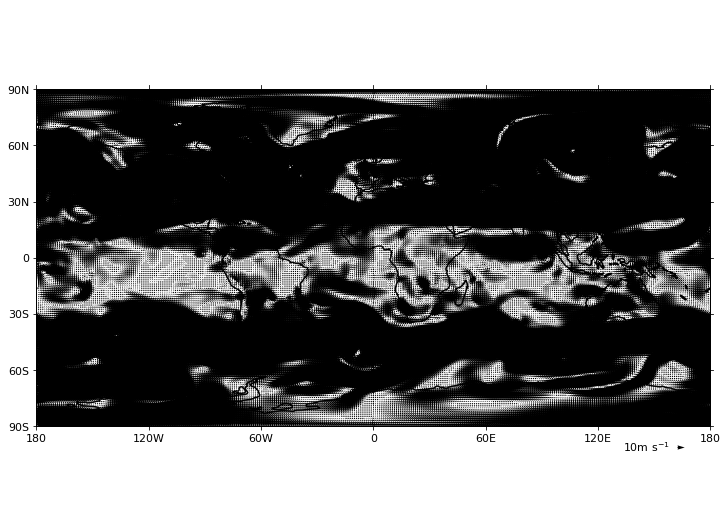

In [2]:
# Select u and v wind components at 500mb and make a vector plot
f=cf.read('ncas_data/data1.nc')
u=f[2].subspace(pressure=500)
v=f[3].subspace(pressure=500)
cfp.mapset(0, 360, -90, 90)
cfp.mapset()
cfp.vect(u=u, v=v, key_length=10, scale=100)

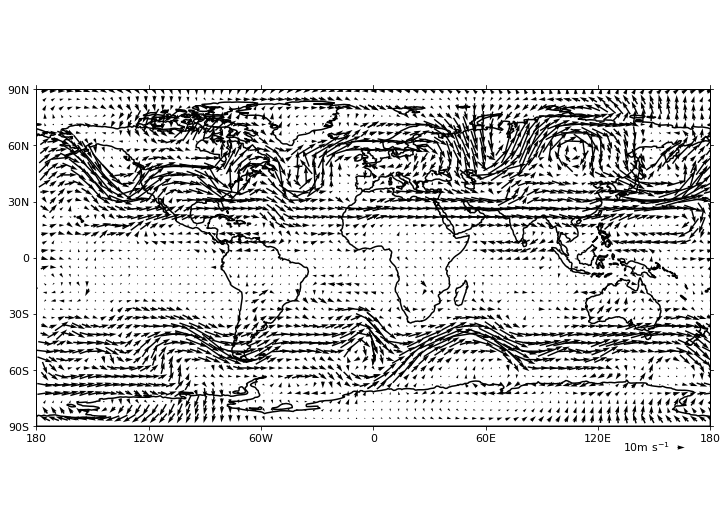

In [3]:
# In the example above we have too many points for the vectors to be discernable 
# We can use a stride of 4 in plotting the vectors to thin out the vectors
cfp.vect(u=u, v=v, key_length=10, scale=100, stride=4)

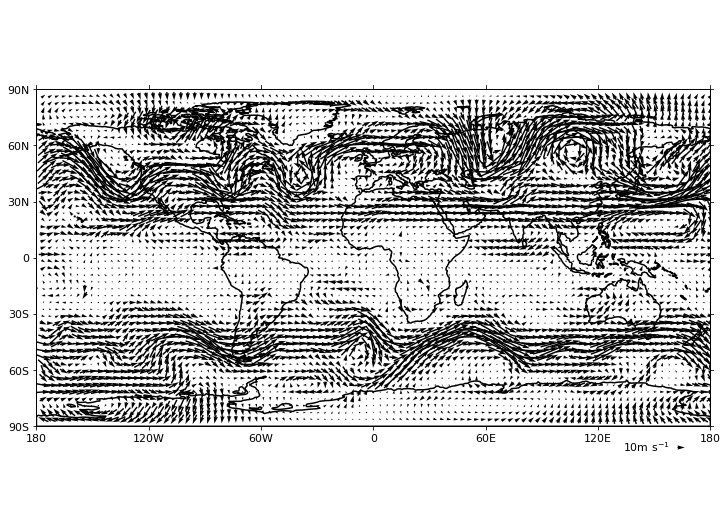

In [4]:
# The pts parameter controls the interpolation of the vectors to a new grid
# One value will give the same number of points in both directions
cfp.vect(u=u, v=v, key_length=10, scale=100, pts=50)

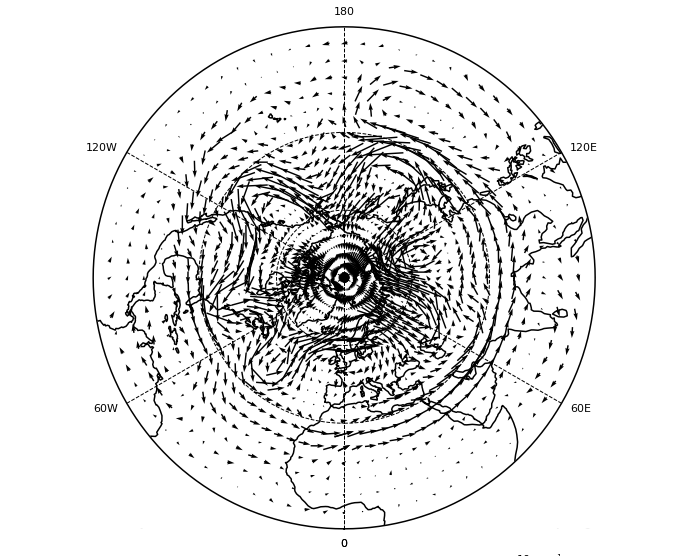

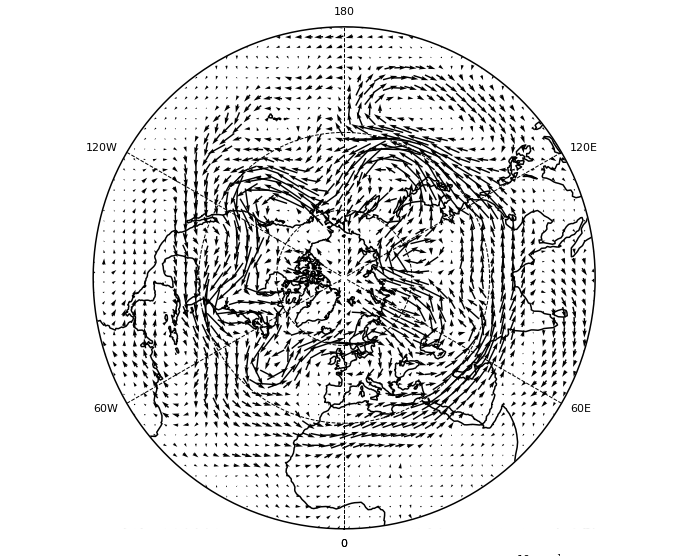

In [5]:
# When making polar stereographic plots use the pts keyword to cfp.vect 
# to specify the number of interpolated points in x and y
cfp.mapset(proj='npstere')
cfp.vect(u=u, v=v, key_length=10, scale=100, stride=4)
cfp.vect(u=u, v=v, key_length=10, scale=100, pts=50)

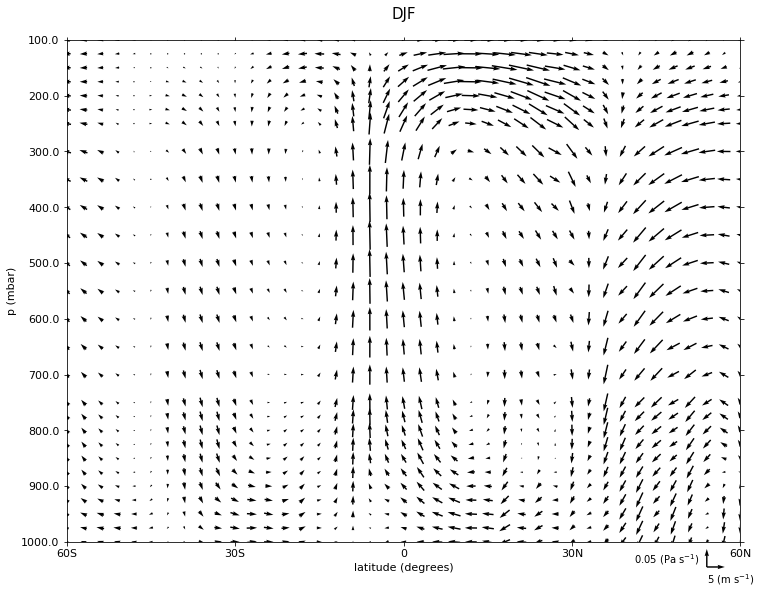

In [6]:
# Vectors can have different lengths and scales as in the example below
c=cf.read('ncas_data/vaAMIPlcd_DJF.nc')[0]
c=c.subspace(Y=cf.wi(-60,60))
c=c.subspace(X=cf.wi(80,160))
c=c.collapse('T: mean X: mean')

g=cf.read('ncas_data/wapAMIPlcd_DJF.nc')[0]
g=g.subspace(Y=cf.wi(-60,60))
g=g.subspace(X=cf.wi(80,160))
g=g.collapse('T: mean X: mean')

cfp.vect(u=c, v=-g, key_length=[5, 0.05], scale=[20,0.2], title='DJF', key_location=[0.95, -0.05])

/home/sadie/anaconda3/lib/python3.7/site-packages/cfplot/cfplot.py:5504: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  projection=proj)


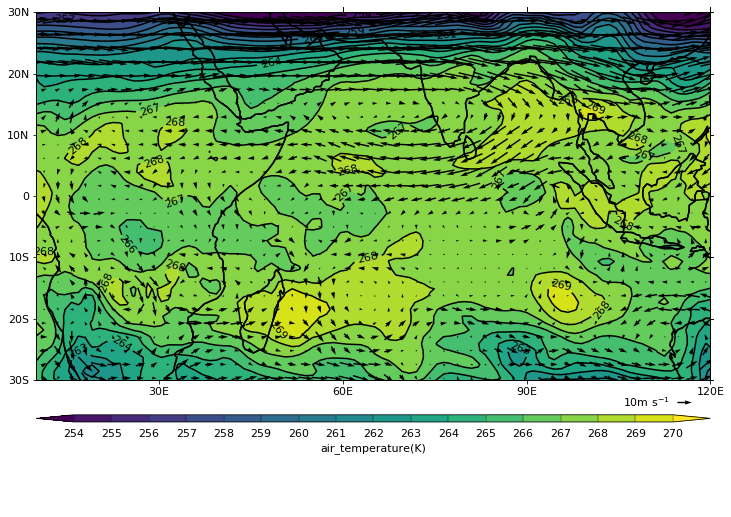

In [7]:
# Making overlaying plots
# In this case we will make a vector plot overlaying a contour plot
# Plots overlaying each other or multiple plots on a page need to be
# enclosed within a cfp.gopen() cfp.gclose() pair.  See additional
# material on multiple plots in the cf-plot directory.

import cf, cfplot as cfp
f=cf.read('ncas_data/data1.nc')
u=f[2].subspace(pressure=500)
v=f[3].subspace(pressure=500)
t=f[1].subspace(pressure=500)


cfp.gopen()
cfp.mapset(lonmin=10, lonmax=120, latmin=-30, latmax=30)
cfp.levs(min=254, max=270, step=1)
cfp.con(t)
cfp.vect(u=u, v=v, key_length=10, scale=50, stride=2)
cfp.gclose()

# `cfp.lineplot` - making line plots



In [8]:
# Read in some temperature data and convert to Celsius
f = cf.read('ncas_data/data1.nc')[1]
f = f.collapse('mean','longitude')
f.Units -= 273.15

In [9]:
# Reset the plotting limits
cfp.gset()

In [10]:
f.construct('latitude').array

array([ 89.14152   ,  88.02943   ,  86.910774  ,  85.79063   ,
        84.66992   ,  83.54895   ,  82.42782   ,  81.306595  ,
        80.18531   ,  79.06398   ,  77.94263   ,  76.82124   ,
        75.699844  ,  74.57843   ,  73.45701   ,  72.33558   ,
        71.214134  ,  70.09269   ,  68.97124   ,  67.849785  ,
        66.728325  ,  65.606865  ,  64.4854    ,  63.363934  ,
        62.242462  ,  61.12099   ,  59.99952   ,  58.878044  ,
        57.75657   ,  56.635094  ,  55.513615  ,  54.392136  ,
        53.270657  ,  52.149174  ,  51.027695  ,  49.90621   ,
        48.78473   ,  47.663246  ,  46.541763  ,  45.42028   ,
        44.298794  ,  43.17731   ,  42.055824  ,  40.934338  ,
        39.81285   ,  38.691364  ,  37.56988   ,  36.44839   ,
        35.326904  ,  34.205418  ,  33.08393   ,  31.962444  ,
        30.840956  ,  29.719467  ,  28.597979  ,  27.47649   ,
        26.355003  ,  25.233515  ,  24.112024  ,  22.990536  ,
        21.869047  ,  20.747559  ,  19.62607   ,  18.50

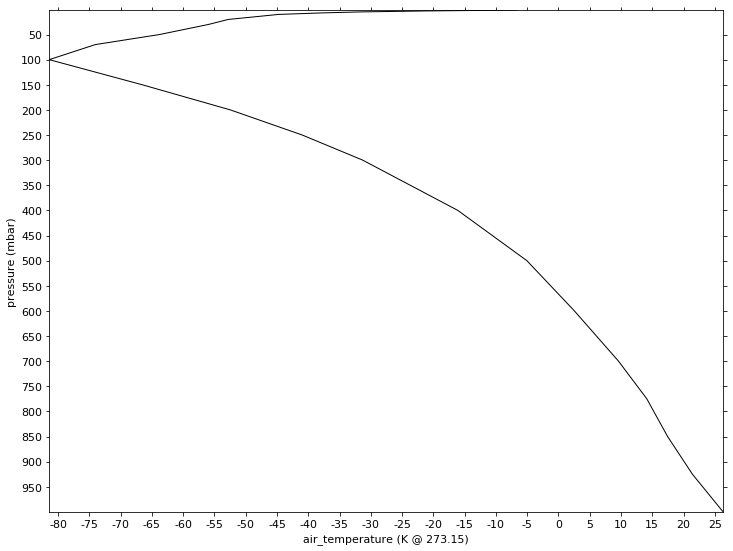

In [11]:
# Make a lineplot near to the equator
g=f.subspace(latitude=0.56074494)
cfp.lineplot(g)

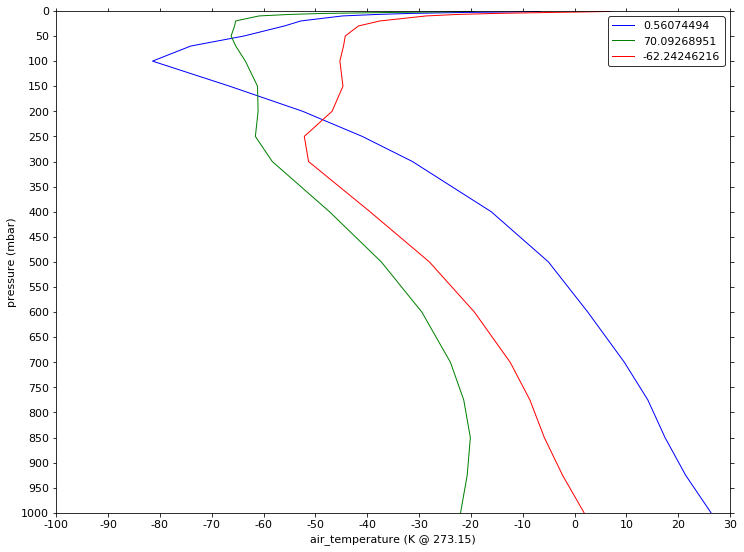

In [12]:
cfp.gopen()
cfp.gset(xmin=-100,xmax=30, ymin=1000, ymax=0)
yticks=[1000, 900,800,700, 600,500,400,300,200,100,0]
cfp.lineplot(f.subspace(latitude=0.56074494), label='0.56074494', color='b')
cfp.lineplot(f.subspace(latitude=70.09268951), label='70.09268951', color='g', yticks=yticks)
cfp.lineplot(f.subspace(latitude=-62.24246216), label='-62.24246216', color='r')
cfp.gclose()

# `cfp.stipple` - Significance plots
## Plotting areas of significance with coloured symbols

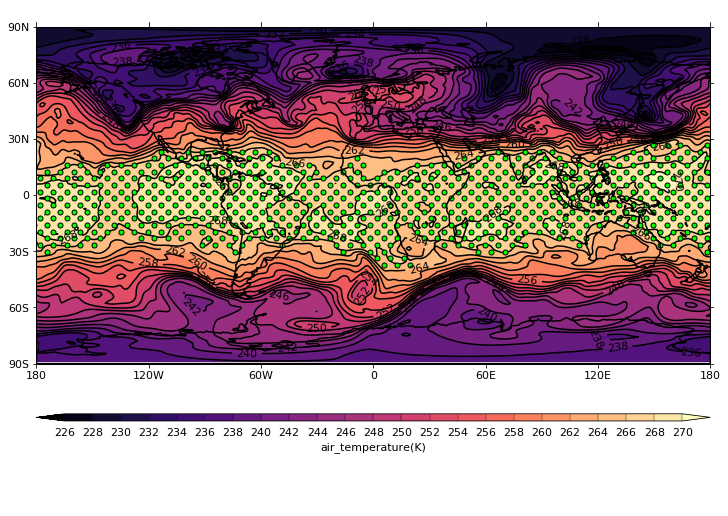

In [13]:
cfp.mapset()
cfp.levs()
f=cf.read('ncas_data/data1.nc')[1]
g=f.subspace(pressure=500)
cfp.gopen()
cfp.cscale('magma')
cfp.con(g)
cfp.stipple(f=g, min=265, max=295, size=100, color='#00ff00')
cfp.gclose()

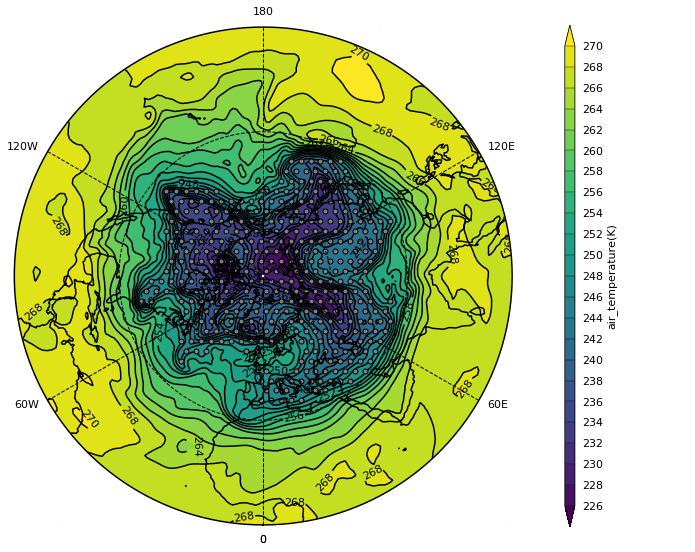

In [14]:
cfp.gopen()
cfp.cscale()
cfp.mapset(proj='npstere')
cfp.con(g)
cfp.stipple(f=g, min=200, max=250, size=100, color='grey')
cfp.gclose()